## MMSegmentation


In [1]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.11.0 True
1.0.0


## Run Inference with MMSeg trained weight

In [2]:
cd mmsegmentation/

/home/ubuntu/code/setup/confs/study/food_detect/mmsegmenthand/mmsegmentation


In [3]:
# !mkdir checkpoints
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints

In [4]:
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/swin/swin_base_patch4_window12_384_22k_20220317-e5c09f74.pth -P checkpoints/

In [5]:
from mmseg.apis import inference_model, init_model, show_result_pyplot
import mmcv

In [6]:
config_file = 'configs/pspnet/pspnet_r50-d8_4xb4-80k_ade20k-512x512.py'
checkpoint_file = 'checkpoints/pspnet_r50-d8_512x512_80k_ade20k_20200615_014128-15a8b914.pth'
# config_file = 'pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
# checkpoint_file = 'pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'
# config_file = 'configs/swin/swin-base-patch4-window12-in22k-384x384-pre_upernet_8xb2-160k_ade20k-512x512.py'
# checkpoint_file = 'checkpoints/swin_base_patch4_window12_384_22k_20220317-e5c09f74.pth'

In [7]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

/home/ubuntu/code/setup/confs/study/food_detect/mmsegmenthand/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/ubuntu/code/setup/confs/study/food_detect/mmsegmenthand/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: checkpoints/pspnet_r50-d8_512x512_80k_ade20k_20200615_014128-15a8b914.pth


In [8]:
# test a single image
img_path = '../data/train/image/epic_P01_02_frame_0000002521.jpg'
result = inference_model(model, img_path)

In [9]:
# show the results
show_result_pyplot(model, img_path, result, show=False, out_file='result.jpg', opacity=0.8)

06/16 14:20:37 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


array([[[122,   4,  51],
        [122,   5,  51],
        [120,   4,  51],
        ...,
        [121, 121, 115],
        [121, 121, 115],
        [126, 125, 127]],

       [[121,   4,  51],
        [121,   4,  51],
        [120,   4,  50],
        ...,
        [121, 121, 115],
        [121, 121, 115],
        [121, 121, 115]],

       [[  0,   0,   9],
        [  0,   0,   8],
        [  0,   0,   8],
        ...,
        [121, 121, 115],
        [121, 121, 115],
        [121, 121, 115]],

       ...,

       [[ 67,  44,  47],
        [ 67,  44,  47],
        [ 67,  44,  47],
        ...,
        [137,  19,  65],
        [138,  19,  65],
        [138,  19,  65]],

       [[ 67,  44,  47],
        [ 67,  44,  47],
        [ 67,  44,  47],
        ...,
        [137,  19,  65],
        [137,  19,  65],
        [138,  19,  65]],

       [[ 67,  44,  47],
        [ 67,  44,  47],
        [ 67,  44,  47],
        ...,
        [137,  19,  65],
        [137,  19,  65],
        [138,  19,  65]]

## Train a semantic segmentation model on a new dataset

To train on a customized dataset, the following steps are necessary. 
1. Add a new dataset class. 
2. Create a config file accordingly. 
3. Perform training and evaluation. 

### Add a new dataset

Datasets in MMSegmentation require image and semantic segmentation maps to be placed in folders with the same prefix. To support a new dataset, we may need to modify the original file structure.

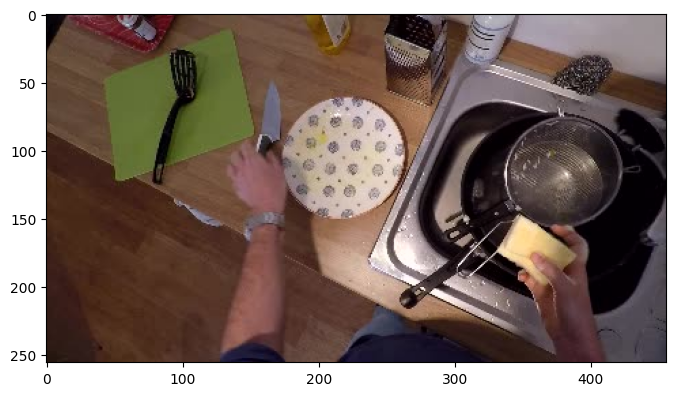

In [10]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('../data/train/image/epic_P01_02_frame_0000002521.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

We need to convert the annotation into semantic map format as an image.

In [11]:
import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = '../data/train'
img_dir = 'images'
ann_dir = 'label_twohands'
# define class and plaette for better visualization
classes = ('background', 'Left_Hand', 'Right_Hand')
palette = [[0, 0, 0], [255, 0, 0], [0, 0, 255]]

In [12]:
fname = osp.basename(img_path).split('.')[0]
img = np.array(Image.open(img_path))
seg_img = np.array(Image.open(osp.join(data_root, ann_dir, fname + '.png')))

In [13]:
# for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):

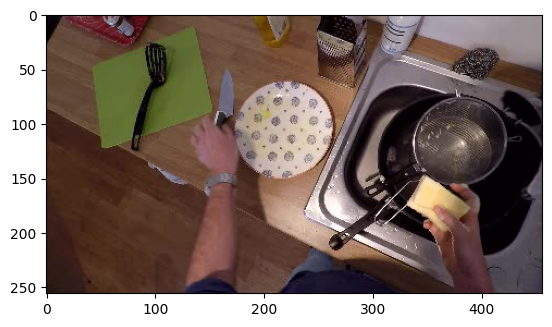

In [14]:
plt.imshow(img)

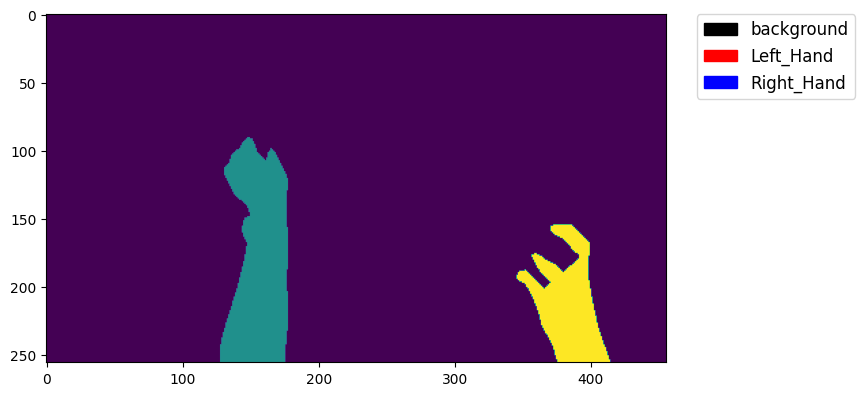

In [15]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
# img = Image.open(img_path)
plt.figure(figsize=(8, 6))
# im = plt.imshow(np.array(img.convert('RGB')))
im = plt.imshow(seg_img)

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(3)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

### Creating a custom dataset class

In [16]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset


@DATASETS.register_module()
class EgoHOSDataset(BaseSegDataset):
    """EgoHOS dataset.

    Args:
        split (str): Split txt file for EgoHOS.
    """
    
    METAINFO = dict(
        classes = ('background', 'Left_Hand', 'Right_Hand'),
        pallete = [[0, 0, 0], [255, 0, 0], [0, 0, 255]])

    def __init__(self, **kwargs):
        super(EgoHOSDataset, self).__init__(
            img_suffix='.jpg', seg_map_suffix='.png', **kwargs)

### Create a config file
We finetune the model from trained weights.

In [17]:
from mmengine import Config
cfg = Config.fromfile(config_file)
# print(f'Config:\n{cfg.pretty_text}')

Since the given config is used to train PSPNet on the cityscapes dataset, we need to modify it accordingly for our new dataset.  

First we setup the model configuration

In [21]:
cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)

In [22]:
# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.crop_size = (360, 480)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 3
cfg.model.auxiliary_head.num_classes = 3

# Modify dataset type and path
cfg.dataset_type = 'EgoHOSDataset'
cfg.data_root = '/home/ubuntu/code/setup/confs/study/food_detect/mmsegmenthand/data'


cfg.train_dataloader.batch_size = 8

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', reduce_zero_label=False),
    dict(type='RandomResize', scale=(360, 480), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
#     dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(360, 480), keep_ratio=True),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='LoadAnnotations', reduce_zero_label=False),
    dict(type='PackSegInputs')
]


cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path='train/image', seg_map_path='train/label_twohands')
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
# cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path='val/image', seg_map_path='val/label_twohands')
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
# cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader.dataset.type = cfg.dataset_type
cfg.test_dataloader.dataset.data_root = cfg.data_root
cfg.test_dataloader.dataset.data_prefix = dict(img_path='test_indomain/image', seg_map_path='test_indomain/label_twohands')
cfg.test_dataloader.dataset.pipeline = cfg.test_pipeline


# Load the pretrained weights
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/first_run'

cfg.train_cfg.max_iters = 600
cfg.train_cfg.val_interval = 200
cfg.default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=50, log_metric_by_epoch=False),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(type='CheckpointHook', by_epoch=False, interval=200),
    visualization=dict(type='SegVisualizationHook', draw=True, interval=1))

# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)

### Save the best model during training, modify the evaluation dictionary

In [23]:
cfg.evaluation = dict(
    interval=2000,
    metric=['mIoU', 'mFscore'],
    pre_eval=True,
    pred_eval=True,
    save_best='mIoU') # You can use 'auto' as a parameter to let mmsegmentation to choose the metric for you.

In [24]:
## Add validation step to the workflow
# cfg.workflow.append(('val',1))
#cfg.workflow deprecated in 2.0

#### If required, modify losses for experimentation.

In [25]:
''' Change the class weights '''  
#cfg.model.decode_head.loss_decode.class_weight= [1.0,1.0,1.0] 

'''Use Dice Loss'''
#cfg.model.decode_head.loss_decode=dict(type='DiceLoss', loss_name='loss_dice', loss_weight=1.0)

''' Increase the learning rate of decode head '''
#cfg.optimizer.paramwise_cfg = dict(custom_keys={'head':dict(lr_mult=10.)})


' Increase the learning rate of decode head '

### MLFlow for experiment tracking

In [26]:
# import mlflow

# mlflow_url = None
# if mlflow_url:
#   mlflow.set_tracking_uri(mlflow_url)

#   #Set the hook for mlflow
#   cfg.log_config.hooks=[
#         dict(type='MlflowLoggerHook',exp_name='mmsegmentation_experiment', log_model=False, interval= 20)
#     ]

### Print the final **config**

In [27]:
# print(f'Config:\n{cfg.pretty_text}')

### Train and Evaluation

In [28]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

06/16 14:21:08 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 | packaged by conda-forge | (main, May 10 2023, 18:58:44) [GCC 11.3.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA A10G
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.6, V11.6.124
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.11.0
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2022.1-Product Build 20220311 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.5.2 (Git Hash a9302535553c73243c632ad3c4c80beec3d19a1e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_

/home/ubuntu/code/setup/confs/study/food_detect/mmsegmenthand/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/home/ubuntu/code/setup/confs/study/food_detect/mmsegmenthand/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/ubuntu/code/setup/confs/study/food_detect/mmsegmenthand/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/16 14:21:10 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/16 14:21:10 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

In [ ]:
# start training
runner.train()

/home/ubuntu/code/setup/confs/study/food_detect/mmsegmenthand/mmsegmentation/mmseg/datasets/transforms/loading.py:78: UserWarning: `reduce_zero_label` will be deprecated, if you would like to ignore the zero label, please set `reduce_zero_label=True` when dataset initialized
  warnings.warn('`reduce_zero_label` will be deprecated, '


06/16 14:21:11 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/16 14:21:11 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
06/16 14:21:11 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
06/16 14:21:12 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: checkpoints/pspnet_r50-d8_512x512_80k_ade20k_20200615_014128-15a8b914.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([3, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([3]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with 

### Inference with trained model

In [ ]:
img = mmcv.imread(img_path)

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)

### Let's assume, we want to load cfg and model weights from the filesystem and run inference

In [ ]:
# Delete the cfg in the memory
try:
    del cfg 
    cfg = None
except NameError:
  cfg = None

# Delete the model in the memory
try:
  del model
  model = None
except NameError:
  model = None
    
from glob import glob

root_dir = 'work_dirs/run'

# Read the config file from filesystem
cfg_filepath = osp.join(root_dir,'config.py')
cfg = mmcv.Config.fromfile(cfg_filepath)

# Get the best model
best_model_path = glob(root_dir+'/best_*.pth')[-1]
print(f'best model is {best_model_path}')

# Initialize the model
model = init_segmentor(cfg, checkpoint=best_model_path, device='cuda:0')

imgs_path = data_root + '/test_outdomain/train'

# Get the image filenames
filename_list = [filename for filename in mmcv.scandir(imgs_path, suffix='.jpg')]

# Run inference for the first 5 images
for filename in filename_list[:5]:
    full_image_path = osp.join(imgs_path,filename)
    img = mmcv.imread(full_image_path)
    palette = model.PALETTE
    plt.figure(figsize=(8, 8),facecolor="w")
    result = inference_segmentor(model, img)
    show_result_pyplot(model, img, result, palette)

### Run inference on validation set seperately and see the scores

In [ ]:
from mmseg.apis import multi_gpu_test, single_gpu_test
from mmseg.datasets import build_dataloader, build_dataset
from mmseg.models import build_segmentor
from mmcv.runner import (get_dist_info, init_dist, load_checkpoint,
                         wrap_fp16_model)

from mmcv.parallel import MMDataParallel

# Get the best model
best_model_path = glob(cfg.work_dir+'/best_*.pth')[-1]
print(f'best model is {best_model_path}')

# Initialize the model
cfg.model.train_cfg = None
model = build_segmentor(cfg.model,)
checkpoint = load_checkpoint(model, best_model_path, map_location='cuda')
model.CLASSES = checkpoint['meta']['CLASSES']
model.PALETTE = checkpoint['meta']['PALETTE']

# Initialize the dataset
test_dataset = build_dataset(cfg.data.val, dict(test_mode=True))
data_loader = build_dataloader(test_dataset,1,1,shuffle=False)
model = MMDataParallel(model, device_ids=[0])

#Run inference and print the results
results = single_gpu_test(model,data_loader,pre_eval='mIoU')
evaluations = test_dataset.evaluate(results)
print(evaluations)